In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import statsmodels.api as sm

In [8]:
def load_vectors_from_directory(directory):
    vectors_dict = {}
    for filename in os.listdir(directory):
        if filename.endswith("_model_vectors.bin"):
            filepath = os.path.join(directory, filename)
            year = filename.split('_')[0]
            model = KeyedVectors.load_word2vec_format(filepath, binary=True)
            vectors_dict[f"{year}wv"] = model
    return vectors_dict

directory_path = 'new_PPDL'
loaded_vectors = load_vectors_from_directory(directory_path)
sorted_keys = sorted(loaded_vectors.keys())
print("Loaded vectors:")
for key in sorted_keys:
    print(key)

Loaded vectors:
1949wv
1950wv
1951wv
1952wv
1953wv
1954wv
1956wv
1957wv
1958wv
1959wv
1960wv
1961wv
1962wv
1963wv
1964wv
1965wv
1966wv
1967wv
1968wv
1969wv
1970wv
1971wv
1976wv
1979wv
1980wv
1981wv
1982wv
1986wv
1987wv
1990wv
1993wv
1994wv
1995wv
1997wv
1998wv
1999wv
2000wv
2001wv
2003wv


In [9]:
# My target word vectors
men_personality = ["竞争", "大胆", "冷静", "支配", "主导", "冒险", "坚定", "坚持", "雄心",
                   "勇敢", "胆大", "豪放", "大度", "慷慨", "风趣", "理性", "沉稳", "幽默",
                   "果断", "坚强", "果敢", "果断", "分析", "个性", "决策", "乐观", "创造",
                   "自立", "开朗", "精干", "主动", "自信", "自主", "自豪", "专业", "成熟",
                   "无情", "强大", "坚定不移", "效率", "逻辑", "粗暴", "责任感", "权威",
                   "愤慨", "英明", "准确", "清醒", "刻苦", "警惕"]

women_personality = ["感情", "同情", "温和", "敏感", "亲密", "帮助", "交际", "理解", "合作",
                   "善良", "外向", "支持", "温柔", "文雅", "善解人意", "安慰", "柔和", "忠诚",
                   "倾听", "体谅", "爱心", "节俭", "文静", "细心", "勤俭", "害羞", "温暖",
                   "本分", "耐心", "纯真", "整洁", "安分", "含蓄", "和气", "信任", "美好",
                   "吸引", "亲切", "亲爱", "友好"]

men = ["他", "儿子", "爸爸", "舅舅", "哥哥", "弟弟", "外甥", "爷爷", "姥爷", "孙子",
       "他们", "大爷", "男生", "男孩", "男士", "男性", "男人", "男子", "男孩子", "男孩儿"]

women = ["她", "女儿", "妈妈", "舅妈", "姐姐", "妹妹", "外甥女", "奶奶", "姥姥", "孙女"
         "她们", "大妈", "女生", "女孩", "女士", "女性", "妇女", "女人", "女子", "女孩子", "女孩儿"]

In [10]:
# Retireve common words in all models
def find_common_words_in_models(vectors_dict, word_list):
    common_words = set(word_list)
    for model in vectors_dict.values():
        common_words.intersection_update(model.key_to_index)
    return list(common_words)

men_personality = find_common_words_in_models(loaded_vectors, men_personality)
women_personality = find_common_words_in_models(loaded_vectors, women_personality)
men = find_common_words_in_models(loaded_vectors, men)
women = find_common_words_in_models(loaded_vectors, women)

print(men_personality)
print(women_personality)
print(men)
print(women)

['分析', '准确', '无情', '创造', '主动', '坚定', '支配', '效率', '大胆', '坚定不移', '逻辑', '竞争', '强大', '责任感', '粗暴', '坚强', '冒险', '英明', '自豪', '清醒', '警惕', '刻苦', '勇敢', '专业', '愤慨', '成熟', '权威']
['理解', '友好', '合作', '亲爱', '吸引', '亲密', '温暖', '同情', '信任', '倾听', '支持', '耐心', '亲切', '忠诚', '美好', '感情']
['爸爸', '哥哥', '儿子', '弟弟']
['女儿', '妇女', '妈妈']


/Users/caojie/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


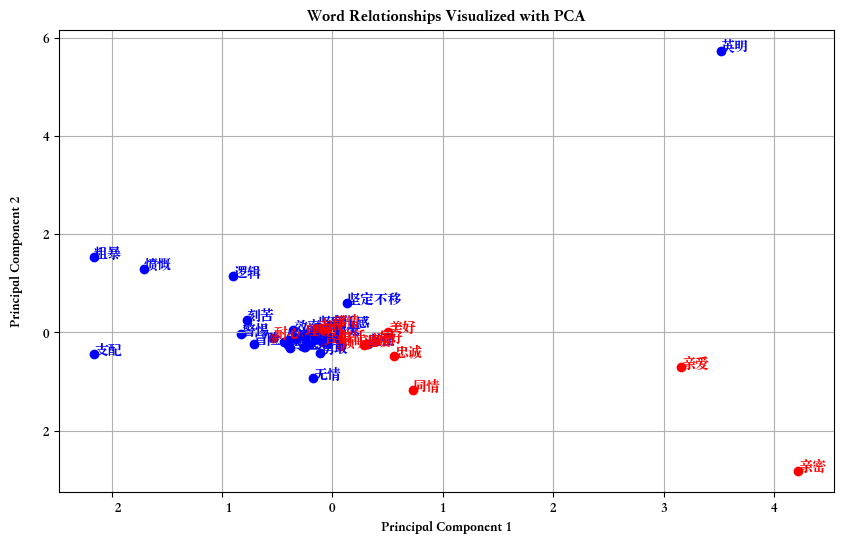

In [12]:
# PCA of a certain model
def plot_word_relationships(file_path, year, word_list1, word_list2):
    model_path = file_path + '/{}_model_vectors.bin'.format(year)
    model = KeyedVectors.load_word2vec_format(model_path, binary=True)
    words1 = [word for word in word_list1 if word in model.key_to_index]
    words2 = [word for word in word_list2 if word in model.key_to_index]
    vectors1 = [model[word] for word in words1]
    vectors2 = [model[word] for word in words2]
    all_vectors = vectors1 + vectors2
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(all_vectors)
    reduced_vectors1 = reduced_vectors[:len(vectors1)]
    reduced_vectors2 = reduced_vectors[len(vectors1):]
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors1[:, 0], reduced_vectors1[:, 1], color='blue', label='List 1')
    plt.scatter(reduced_vectors2[:, 0], reduced_vectors2[:, 1], color='red', label='List 2')
    for word, (x, y) in zip(words1, reduced_vectors1):
        plt.text(x, y, word, color='blue')
    for word, (x, y) in zip(words2, reduced_vectors2):
        plt.text(x, y, word, color='red')
    plt.rcParams['font.sans-serif'] = ['Songti SC']
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Relationships Visualized with PCA')
    plt.grid(True)
    plt.show()

file_path = 'new_PPDL'
plot_word_relationships(file_path, 2000, men_personality, women_personality)

/Users/caojie/Library/Python/3.9/lib/python/site-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


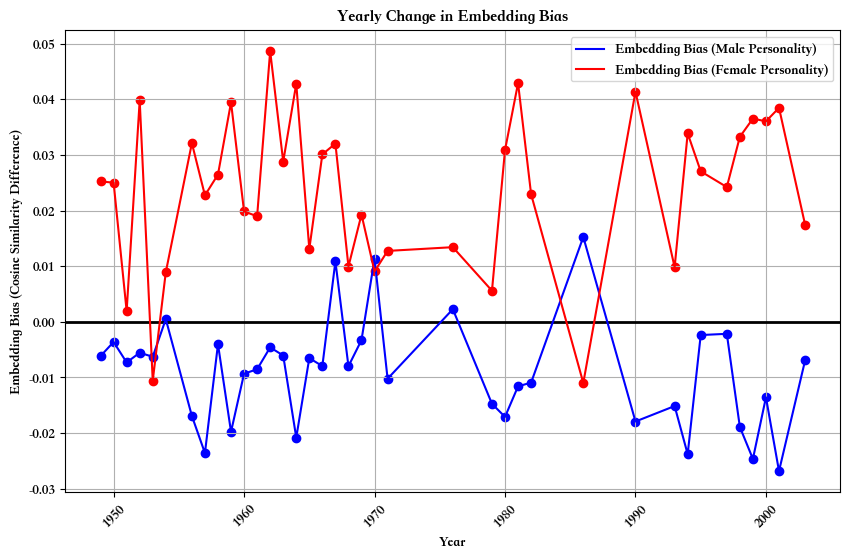

In [14]:
# plot EB for each year
def average_vector(words, model):
    valid_words = [word for word in words if word in model.key_to_index]
    return np.mean([model[word] for word in valid_words], axis=0) if valid_words else None

def average_cosine_similarity(base_vector, other_words, model):
    similarities = [1 - cosine(base_vector, model[word]) for word in other_words if word in model.key_to_index]
    return np.mean(similarities) if similarities else None

diff_values_men_traits = {}
diff_values_women_traits = {}

for year_wv, model in loaded_vectors.items():
    year = int(year_wv[:-2])
    avg_vector_men = average_vector(men, model)
    avg_vector_women = average_vector(women, model)

    if avg_vector_men is not None and avg_vector_women is not None:
        avg_sim_men_men_traits = average_cosine_similarity(avg_vector_men, men_personality, model)
        avg_sim_women_men_traits = average_cosine_similarity(avg_vector_women, men_personality, model)
        if avg_sim_men_men_traits is not None and avg_sim_women_men_traits is not None:
            diff_men_traits = avg_sim_men_men_traits - avg_sim_women_men_traits
            if abs(diff_men_traits) <= 0.6:
                diff_values_men_traits[year] = diff_men_traits

        avg_sim_men_women_traits = average_cosine_similarity(avg_vector_men, women_personality, model)
        avg_sim_women_women_traits = average_cosine_similarity(avg_vector_women, women_personality, model)
        if avg_sim_men_women_traits is not None and avg_sim_women_women_traits is not None:
            diff_women_traits = avg_sim_women_women_traits - avg_sim_men_women_traits
            if abs(diff_women_traits) <= 0.6:
                diff_values_women_traits[year] = diff_women_traits

all_years = np.array(range(min(diff_values_men_traits.keys()), max(diff_values_men_traits.keys()) + 1))
men_diffs = np.array([diff_values_men_traits.get(year, np.nan) for year in all_years])
women_diffs = np.array([diff_values_women_traits.get(year, np.nan) for year in all_years]) 

not_nan_men = ~np.isnan(men_diffs)
not_nan_women = ~np.isnan(women_diffs)
men_diffs_filled = np.interp(all_years, all_years[not_nan_men], men_diffs[not_nan_men])
women_diffs_filled = np.interp(all_years, all_years[not_nan_women], women_diffs[not_nan_women])

plt.figure(figsize=(10, 6))
plt.rc('axes', unicode_minus=False)
plt.axhline(0, color='black', linewidth=2, linestyle='-') 
plt.plot(all_years, men_diffs_filled, linestyle='-', color='blue', label='Embedding Bias (Male Personality)')
plt.plot(all_years, women_diffs_filled, linestyle='-', color='red', label='Embedding Bias (Female Personality)')
plt.scatter(all_years[not_nan_men], men_diffs[not_nan_men], color='blue')
plt.scatter(all_years[not_nan_women], women_diffs[not_nan_women], color='red')
plt.xticks([year for year in all_years if year % 10 == 0], rotation=45)
plt.xlabel('Year')
plt.ylabel('Embedding Bias (Cosine Similarity Difference)')
plt.title('Yearly Change in Embedding Bias')
plt.legend()
plt.grid(True)
plt.show()


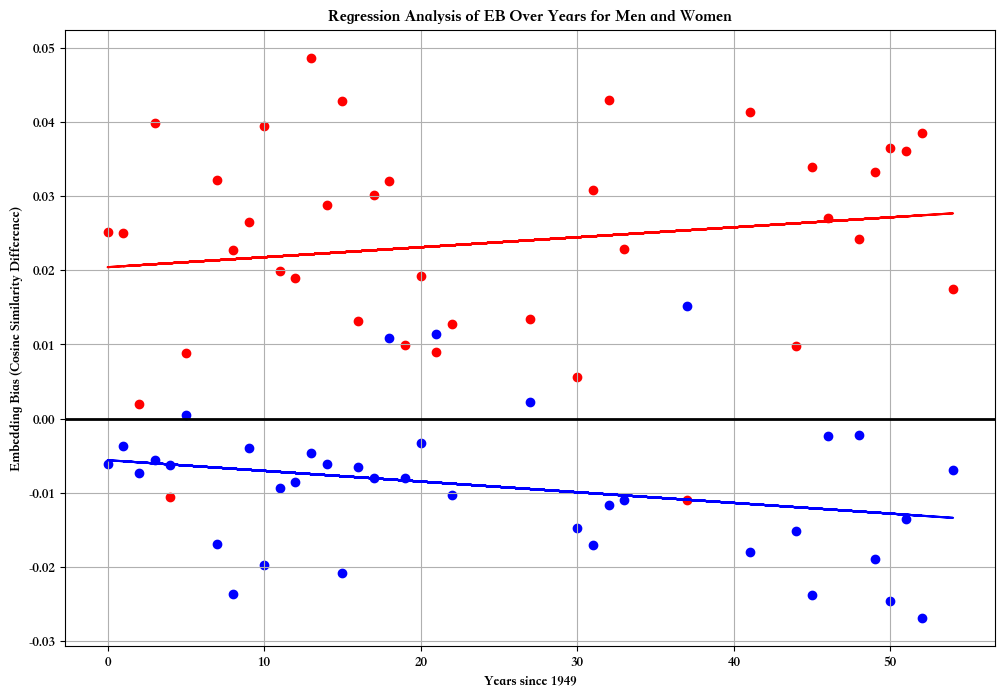

In [16]:
# linear regression
years_men = np.array(list(diff_values_men_traits.keys()))
diffs_men = np.array(list(diff_values_men_traits.values()))

years_women = np.array(list(diff_values_women_traits.keys()))
diffs_women = np.array(list(diff_values_women_traits.values()))

years_since_1949_men = years_men - 1949
years_since_1949_women = years_women - 1949

X_men = sm.add_constant(years_since_1949_men)
model_men = sm.OLS(diffs_men, X_men)
results_men = model_men.fit()

X_women = sm.add_constant(years_since_1949_women)
model_women = sm.OLS(diffs_women, X_women)
results_women = model_women.fit()

plt.figure(figsize=(12, 8))
plt.scatter(years_since_1949_men, diffs_men, color='blue')
plt.plot(years_since_1949_men, results_men.fittedvalues, 'b-', label='Fitted Line Men')
plt.scatter(years_since_1949_women, diffs_women, color='red')
plt.plot(years_since_1949_women, results_women.fittedvalues, 'r-', label='Fitted Line Women')
plt.axhline(0, color='black', linewidth=2, linestyle='-')
plt.xlabel('Years since 1949')
plt.ylabel('Embedding Bias (Cosine Similarity Difference)')
plt.title('Regression Analysis of EB Over Years for Men and Women')
plt.grid(True)
plt.show()

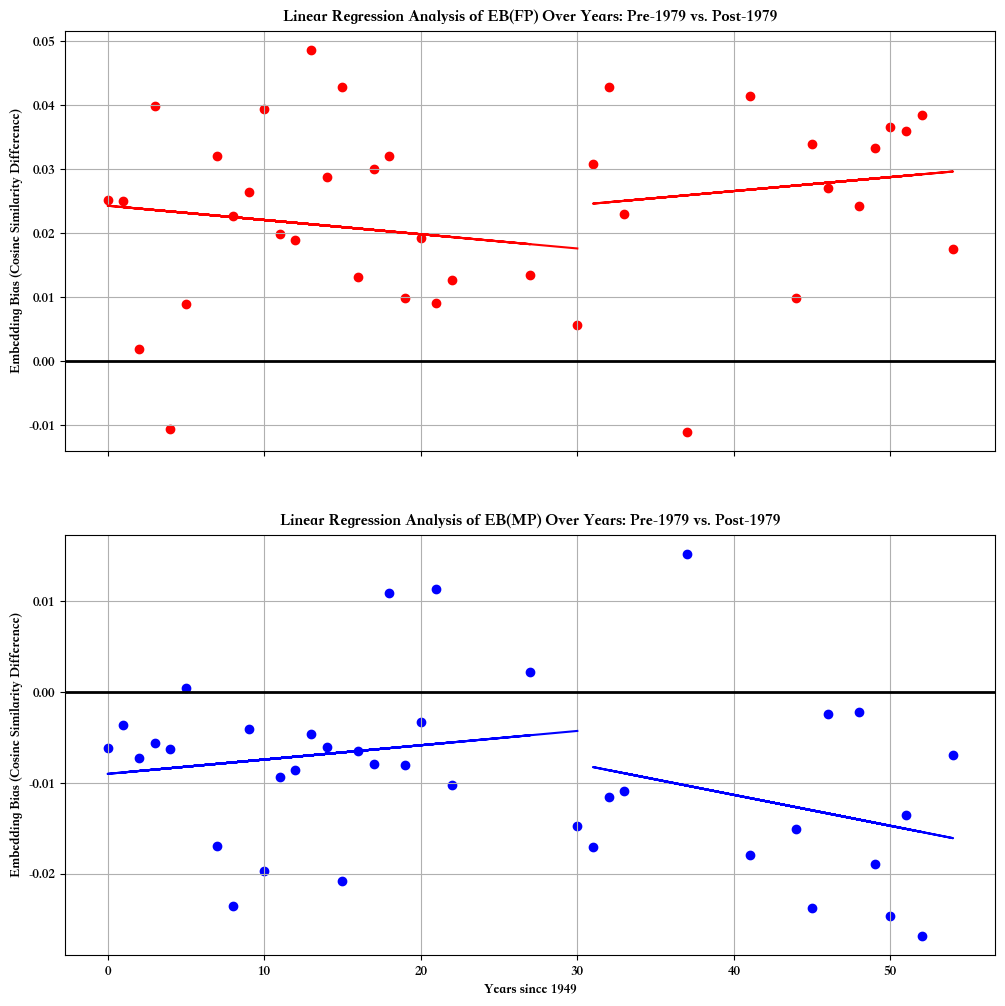

In [17]:
# Devide the time period by 1979, the first year of the openining-up policy
years_since_1949_men = years_men - 1949
years_since_1949_women = years_women - 1949

split_year = 1979 - 1949
pre_1979_men = years_since_1949_men <= split_year
post_1979_men = years_since_1949_men > split_year
pre_1979_women = years_since_1949_women <= split_year
post_1979_women = years_since_1949_women > split_year

X_pre_men = sm.add_constant(years_since_1949_men[pre_1979_men])
y_pre_men = diffs_men[pre_1979_men]
model_pre_men = sm.OLS(y_pre_men, X_pre_men)
results_pre_men = model_pre_men.fit()

X_post_men = sm.add_constant(years_since_1949_men[post_1979_men])
y_post_men = diffs_men[post_1979_men]
model_post_men = sm.OLS(y_post_men, X_post_men)
results_post_men = model_post_men.fit()

X_pre_women = sm.add_constant(years_since_1949_women[pre_1979_women])
y_pre_women = diffs_women[pre_1979_women]
model_pre_women = sm.OLS(y_pre_women, X_pre_women)
results_pre_women = model_pre_women.fit()

X_post_women = sm.add_constant(years_since_1949_women[post_1979_women])
y_post_women = diffs_women[post_1979_women]
model_post_women = sm.OLS(y_post_women, X_post_women)
results_post_women = model_post_women.fit()

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

axs[0].scatter(years_since_1949_women[pre_1979_women], y_pre_women, color='red', label='Pre-1979 Women')
axs[0].scatter(years_since_1949_women[post_1979_women], y_post_women, color='red', label='Post-1979 Women')
axs[0].plot(years_since_1949_women[pre_1979_women], results_pre_women.fittedvalues, 'r-', label='Fitted Line Pre-1979 Women')
axs[0].plot(years_since_1949_women[post_1979_women], results_post_women.fittedvalues, 'r-', label='Fitted Line Post-1979 Women')
axs[0].axhline(0, color='black', linewidth=2, linestyle='-')
axs[0].set_ylabel('Embedding Bias (Cosine Similarity Difference)')
axs[0].set_title('Linear Regression Analysis of EB(FP) Over Years: Pre-1979 vs. Post-1979')
axs[0].grid(True)

axs[1].scatter(years_since_1949_men[pre_1979_men], y_pre_men, color='blue', label='Pre-1979 Men')
axs[1].scatter(years_since_1949_men[post_1979_men], y_post_men, color='blue', label='Post-1979 Men')
axs[1].plot(years_since_1949_men[pre_1979_men], results_pre_men.fittedvalues, 'b-', label='Fitted Line Pre-1979 Men')
axs[1].plot(years_since_1949_men[post_1979_men], results_post_men.fittedvalues, 'b-', label='Fitted Line Post-1979 Men')
axs[1].axhline(0, color='black', linewidth=2, linestyle='-')
axs[1].set_xlabel('Years since 1949')
axs[1].set_ylabel('Embedding Bias (Cosine Similarity Difference)')
axs[1].set_title('Linear Regression Analysis of EB(MP) Over Years: Pre-1979 vs. Post-1979')
axs[1].grid(True)

plt.show()